In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [1]:
from sklearn.datasets import load_iris
import numpy as np
data = load_iris()
data.target[[10, 25, 50]]
np.array([0, 0, 1])
list(data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [2]:
first_type = np.array([data.data[i] for i in range(150) if data.target[i] == 0])
second_type = np.array([data.data[i] for i in range(150) if data.target[i] == 1])
third_type = np.array([data.data[i] for i in range(150) if data.target[i] == 2])

In [4]:
first_mark_1 = np.zeros(4)
second_mark_1 = np.zeros(4)
third_mark_1 = np.zeros(4)
matrix_1 = np.zeros((50, 4))
matrix_2 = np.zeros((50, 4))
matrix_3 = np.zeros((50, 4))

In [5]:
for i in range(4):
    first_mark_1[i] = np.sum(first_type[j][i] for j in range(50))/50
    second_mark_1[i] = np.sum(second_type[j][i] for j in range(50))/50
    third_mark_1[i] = np.sum(third_type[j][i] for j in range(50))/50

for j in range(4):
    for i in range(50):
        matrix_1[i][j] = first_type[i][j] - first_mark_1[j]
        matrix_2[i][j] = second_type[i][j] - second_mark_1[j]
        matrix_3[i][j] = third_type[i][j] - third_mark_1[j]
first_mark_2 = np.dot(matrix_1.T, matrix_1) / 50
second_mark_2 = np.dot(matrix_2.T, matrix_2) / 50
third_mark_2 = np.dot(matrix_3.T, matrix_3) / 50

Полученные оценки дял каждой компоненты смеси

In [13]:
print(first_mark_1)
print(first_mark_2)
print('-------------')
print(second_mark_1)
print(second_mark_2)
print('-------------')
print(third_mark_1)
print(third_mark_2)


[ 5.006  3.418  1.464  0.244]
[[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]]
-------------
[ 5.936  2.77   4.26   1.326]
[[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]]
-------------
[ 6.588  2.974  5.552  2.026]
[[ 0.396256  0.091888  0.297224  0.048112]
 [ 0.091888  0.101924  0.069952  0.046676]
 [ 0.297224  0.069952  0.298496  0.047848]
 [ 0.048112  0.046676  0.047848  0.073924]]


In [76]:
def density_for_first_iris(comp_1, comp_2):
    pdf1 = first_type[:, comp_1]
    pdf2 = first_type[:, comp_2]
    x = np.arange(-3, 10, 0.04)
    y = np.arange(-3, 10, 0.04)
    N = 325
    rv = sts.multivariate_normal([first_mark_1[comp_1], first_mark_1[comp_2]], 
                                          [[first_mark_2[comp_1][comp_1], first_mark_2[comp_1][comp_2]], \
                                           [first_mark_2[comp_2][comp_1], first_mark_2[comp_2][comp_2]]])
    z = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            z[i][j] = rv.pdf([x[i],y[j]])

    x_grid, y_grid = np.meshgrid(x, y)
    plt.figure(figsize=(15, 8))
    CS = plt.contour(x_grid, y_grid, z, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    p = plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    
    plt.xlim([-3, 5])
    plt.ylim([0, 9])
    l = plt.title('components' + '(' + str(comp_1) + ',' + str(comp_2) + ')' + 'iris 1')   
    p1 = plt.scatter(pdf2, pdf1)
    plt.show()

In [78]:
def density_for_second_iris(comp_1, comp_2):
    pdf1 = second_type[:, comp_1]
    pdf2 = second_type[:, comp_2]
    x = np.arange(-3, 10, 0.04)
    y = np.arange(-3, 10, 0.04)
    N = 325
    rv = sts.multivariate_normal([second_mark_1[comp_1], second_mark_1[comp_2]], 
                                          [[second_mark_2[comp_1][comp_1], second_mark_2[comp_1][comp_2]], \
                                           [second_mark_2[comp_2][comp_1], second_mark_2[comp_2][comp_2]]])
    z = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            z[i][j] = rv.pdf([x[i],y[j]])

    x_grid, y_grid = np.meshgrid(x, y)
    plt.figure(figsize=(15, 8))
    CS = plt.contour(x_grid, y_grid, z, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    p = plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    plt.xlim([-3, 5])
    plt.ylim([0, 9])
    p1 = plt.scatter(pdf2, pdf1)
    l = plt.title('components' + '(' + str(comp_1) + ',' + str(comp_2) + ')' + 'iris 2')  
    plt.show()

In [77]:
def density_for_third_iris(comp_1, comp_2):
    pdf1 = third_type[:, comp_1]
    pdf2 = third_type[:, comp_2]
    x = np.arange(-3, 10, 0.04)
    y = np.arange(-3, 10, 0.04)
    N = 325
    rv = sts.multivariate_normal([third_mark_1[comp_1], third_mark_1[comp_2]], 
                                          [[third_mark_2[comp_1][comp_1], third_mark_2[comp_1][comp_2]], \
                                           [third_mark_2[comp_2][comp_1], third_mark_2[comp_2][comp_2]]])
    z = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            z[i][j] = rv.pdf([x[i],y[j]])

    x_grid, y_grid = np.meshgrid(x, y)
    plt.figure(figsize=(15, 8))
    CS = plt.contour(x_grid, y_grid, z, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    p = plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    plt.xlim([-3, 5])
    plt.ylim([0, 9])
    p1 = plt.scatter(pdf2, pdf1)
    l = plt.title('components' + '(' + str(comp_1) + ',' + str(comp_2) + ')' + 'iris 3')  
    plt.show()

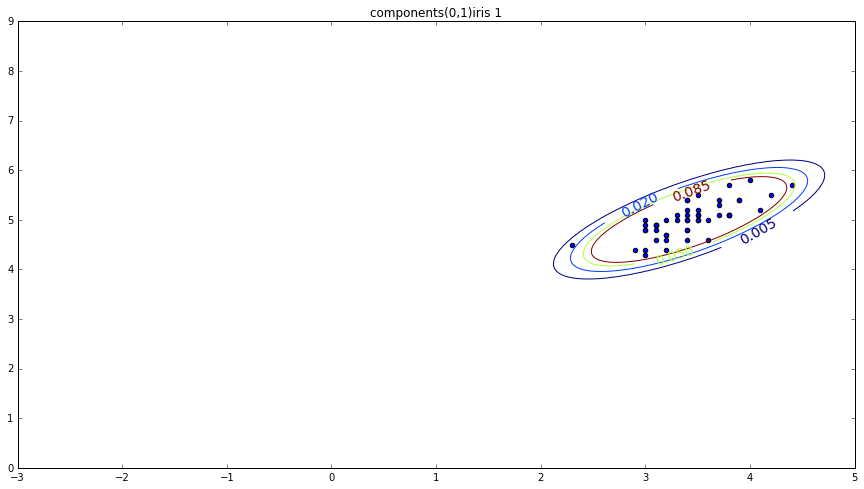

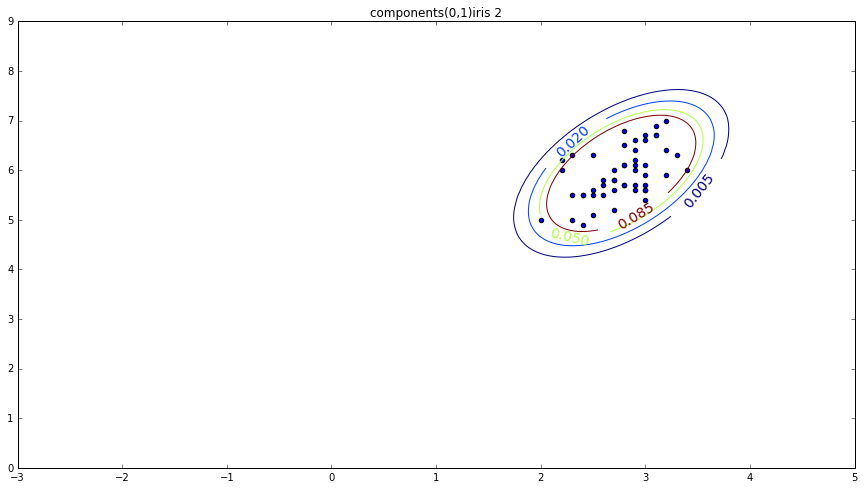

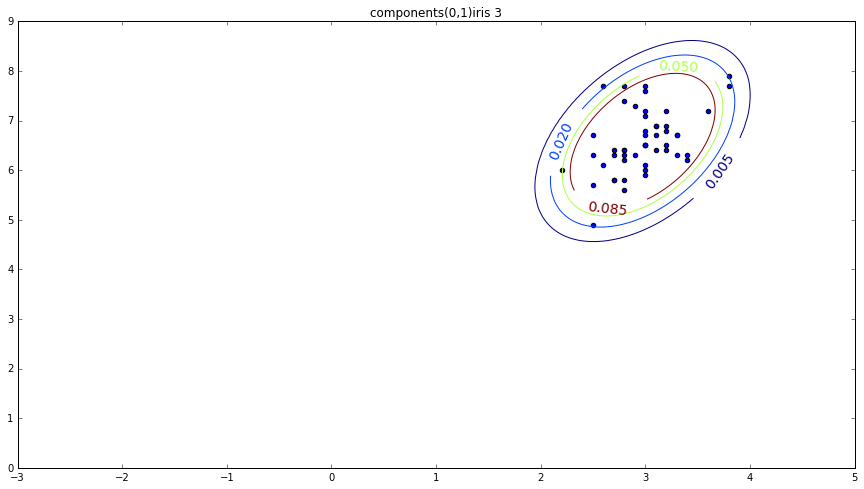

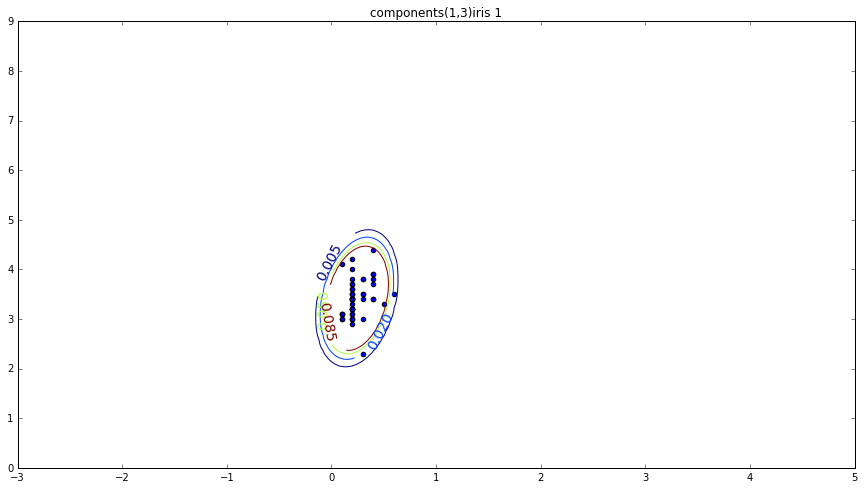

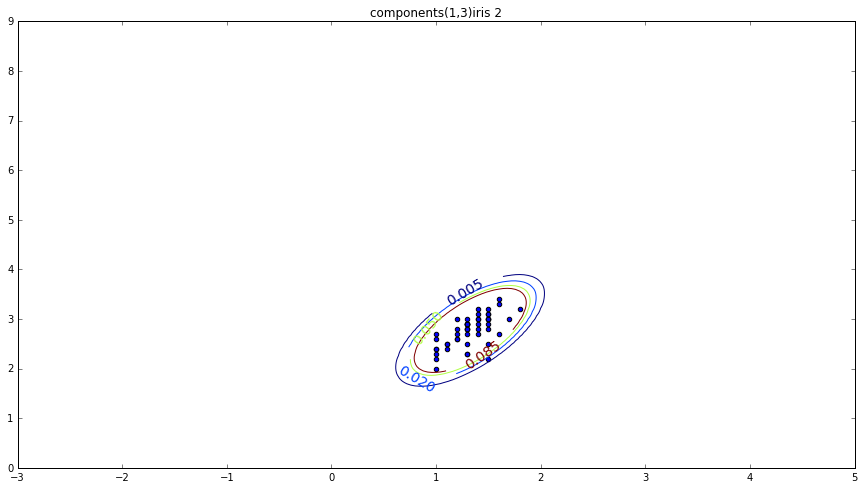

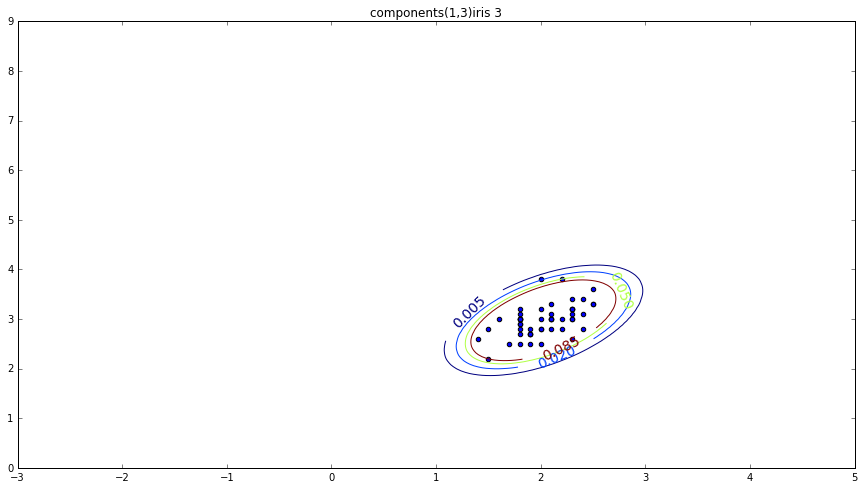

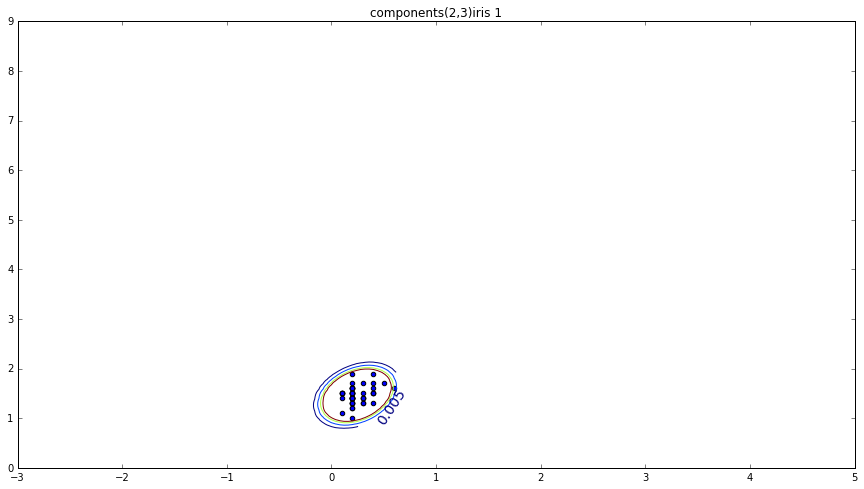

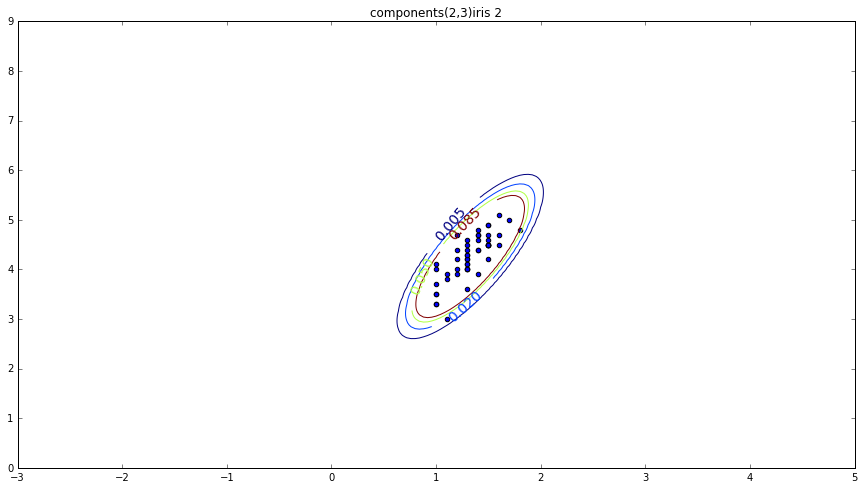

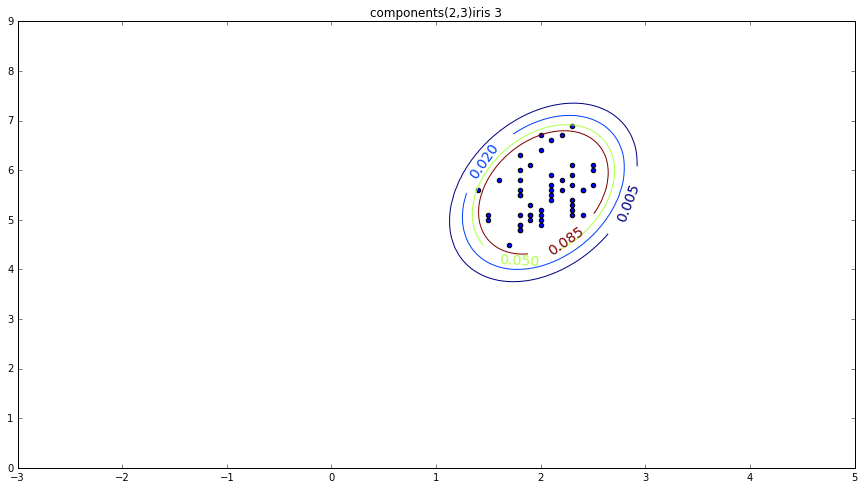

In [79]:
for i in [[0, 1], [1, 3], [2, 3]]:
    density_for_first_iris(i[0], i[1])
    density_for_second_iris(i[0], i[1])
    density_for_third_iris(i[0], i[1])
    

Посчитаем вероятность каждой компоненты в смеси и получим,что они равновероянты

In [45]:
P_t = np.array([[first_type.size] , [second_type.size], [third_type.size]]) * 1.0 / data.data.size
print(P_t)

[[ 0.33333333]
 [ 0.33333333]
 [ 0.33333333]]


In [47]:
mean = np.zeros((3, 4))
for j in range(4):
    mean[0][j] = first_type[:, j].mean()
    mean[1][j] = second_type[:, j].mean()
    mean[2][j] = third_type[:, j].mean()
conditional_mean = np.array([(mean[1, :] + mean[2, :]) / 2, (mean[0, :] + mean[2, :]) / 2, (mean[1, :] + mean[0, :]) / 2 ])
print (conditional_mean)

[[ 6.262  2.872  4.906  1.676]
 [ 5.797  3.196  3.508  1.135]
 [ 5.471  3.094  2.862  0.785]]


Рассчитаем условные матожидания:

$E(X|T \neq 0) = (6.262,  2.872,  4.906,  1.676)$

$E(X|T \neq 1) = (5.797,  3.196,  3.508,  1.135)$

$E(X|T \neq 2) = (5.471,  3.094,  2.862,  0.785)$

In [56]:
##новые оценки
for j in range(4):
    for i in range(50):
        matrix_1[i][j] = (second_type[i][j] - conditional_mean[1][j] + third_type[i][j] - conditional_mean[2][j]) / 2
        matrix_2[i][j] = (third_type[i][j] - conditional_mean[2][j] + first_type[i][j] - conditional_mean[0][j]) / 2
        matrix_3[i][j] = (first_type[i][j] - conditional_mean[0][j] + second_type[i][j] - conditional_mean[1][j]) / 2
first_mark_21 = np.dot(matrix_1.T, matrix_1) / 50
second_mark_22 = np.dot(matrix_2.T, matrix_2) / 50
third_mark_23 = np.dot(matrix_3.T, matrix_3) / 50

In [81]:
def cond_density_for_first_iris(comp_1, comp_2):
    pdf1 = second_type[:, comp_1]
    pdf2 = second_type[:, comp_2]
    pdf3 = third_type[:, comp_1]
    pdf4 = third_type[:, comp_2]
    x = np.arange(-3, 10, 0.04)
    y = np.arange(-3, 10, 0.04)
    N = 325
    rv = sts.multivariate_normal([conditional_mean[1][comp_1], conditional_mean[1][comp_2]], 
                                          [[second_mark_22[comp_1][comp_1], second_mark_22[comp_1][comp_2]], \
                                           [second_mark_22[comp_2][comp_1], second_mark_22[comp_2][comp_2]]])
    rval = sts.multivariate_normal([conditional_mean[2][comp_1], conditional_mean[2][comp_2]], 
                                          [[third_mark_23[comp_1][comp_1], third_mark_23[comp_1][comp_2]], \
                                           [third_mark_23[comp_2][comp_1], third_mark_23[comp_2][comp_2]]])
    z = np.zeros((N, N))
    zz = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            z[i][j] = rv.pdf([x[i],y[j]])
            zz[i][j] = rval.pdf([x[i],y[j]])
    x_grid, y_grid = np.meshgrid(x, y)
    plt.figure(figsize=(15, 8))
    CS = plt.contour(x_grid, y_grid, z, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    p = plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    CSS = plt.contour(x_grid, y_grid, zz, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    pp = plt.clabel(CSS, fontsize=14, inline=1, fmt='%1.3f')
    plt.xlim([-3, 5])
    plt.ylim([0, 9])
    p1 = plt.scatter(pdf2, pdf1)
    p2 = plt.scatter(pdf4, pdf3)
    l = plt.title('components' + '(' + str(comp_1) + ',' + str(comp_2) + ')' + 'iris 1')  
    plt.show()

In [82]:
def cond_density_for_second_iris(comp_1, comp_2):
    pdf1 = first_type[:, comp_1]
    pdf2 = first_type[:, comp_2]
    pdf3 = third_type[:, comp_1]
    pdf4 = third_type[:, comp_2]
    x = np.arange(-3, 10, 0.04)
    y = np.arange(-3, 10, 0.04)
    N = 325
    rv = sts.multivariate_normal([conditional_mean[1][comp_1], conditional_mean[1][comp_2]], 
                                          [[first_mark_21[comp_1][comp_1], first_mark_21[comp_1][comp_2]], \
                                           [first_mark_21[comp_2][comp_1], first_mark_21[comp_2][comp_2]]])
    rval = sts.multivariate_normal([conditional_mean[2][comp_1], conditional_mean[2][comp_2]], 
                                          [[third_mark_23[comp_1][comp_1], third_mark_23[comp_1][comp_2]], \
                                           [third_mark_23[comp_2][comp_1], third_mark_23[comp_2][comp_2]]])
    z = np.zeros((N, N))
    zz = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            z[i][j] = rv.pdf([x[i],y[j]])
            zz[i][j] = rval.pdf([x[i],y[j]])
    x_grid, y_grid = np.meshgrid(x, y)
    plt.figure(figsize=(15, 8))
    CS = plt.contour(x_grid, y_grid, z, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    p = plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    CSS = plt.contour(x_grid, y_grid, zz, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    pp = plt.clabel(CSS, fontsize=14, inline=1, fmt='%1.3f')
    plt.xlim([-3, 5])
    plt.ylim([0, 9])
    p1 = plt.scatter(pdf2, pdf1)
    p2 = plt.scatter(pdf4, pdf3)
    l = plt.title('components' + '(' + str(comp_1) + ',' + str(comp_2) + ')' + 'iris 2')  
    plt.show()

In [80]:
def cond_density_for_third_iris(comp_1, comp_2):
    pdf1 = second_type[:, comp_1]
    pdf2 = second_type[:, comp_2]
    pdf3 = first_type[:, comp_1]
    pdf4 = first_type[:, comp_2]
    x = np.arange(-3, 10, 0.04)
    y = np.arange(-3, 10, 0.04)
    N = 325
    rv = sts.multivariate_normal([conditional_mean[1][comp_1], conditional_mean[1][comp_2]], 
                                          [[second_mark_22[comp_1][comp_1], second_mark_22[comp_1][comp_2]], \
                                           [second_mark_22[comp_2][comp_1], second_mark_22[comp_2][comp_2]]])
    rval = sts.multivariate_normal([conditional_mean[2][comp_1], conditional_mean[2][comp_2]], 
                                          [[first_mark_21[comp_1][comp_1], first_mark_21[comp_1][comp_2]], \
                                           [first_mark_21[comp_2][comp_1], first_mark_21[comp_2][comp_2]]])
    z = np.zeros((N, N))
    zz = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            z[i][j] = rv.pdf([x[i],y[j]])
            zz[i][j] = rval.pdf([x[i],y[j]])
    x_grid, y_grid = np.meshgrid(x, y)
    plt.figure(figsize=(15, 8))
    CS = plt.contour(x_grid, y_grid, z, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    p = plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    CSS = plt.contour(x_grid, y_grid, zz, [0.005, 0.02, 0.05, 0.085])  # нарисовать указанные линии уровня
    pp = plt.clabel(CSS, fontsize=14, inline=1, fmt='%1.3f')
    plt.xlim([-3, 5])
    plt.ylim([0, 9])
    p1 = plt.scatter(pdf2, pdf1)
    p2 = plt.scatter(pdf4, pdf3)
    l = plt.title('components' + '(' + str(comp_1) + ',' + str(comp_2) + ')' + 'iris 3')  
    plt.show()

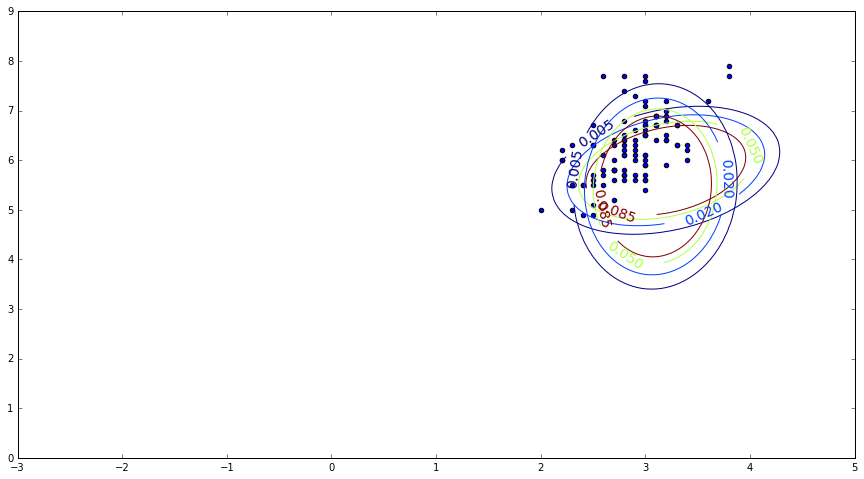

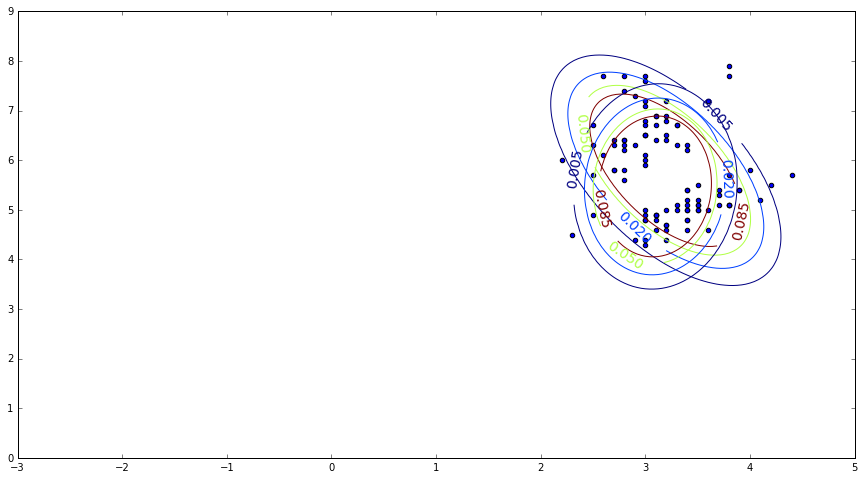

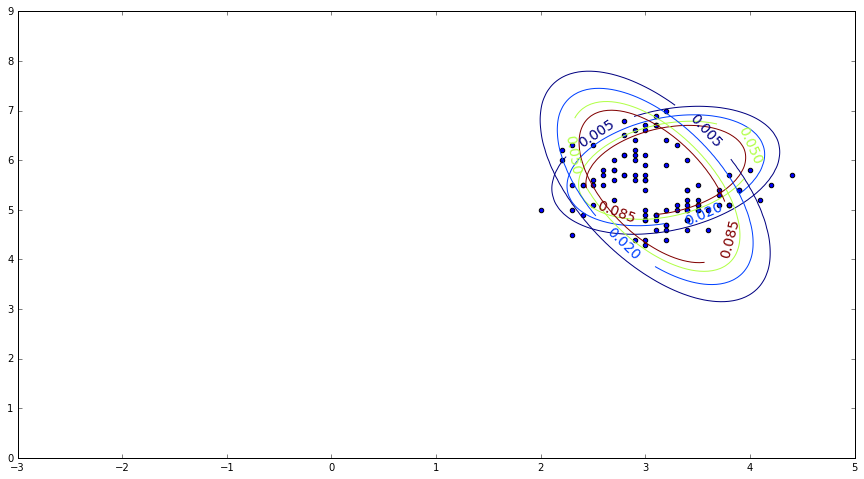

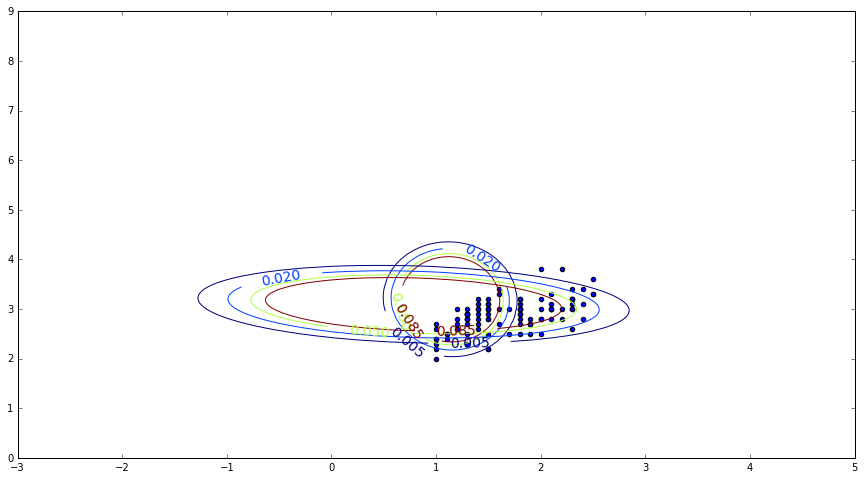

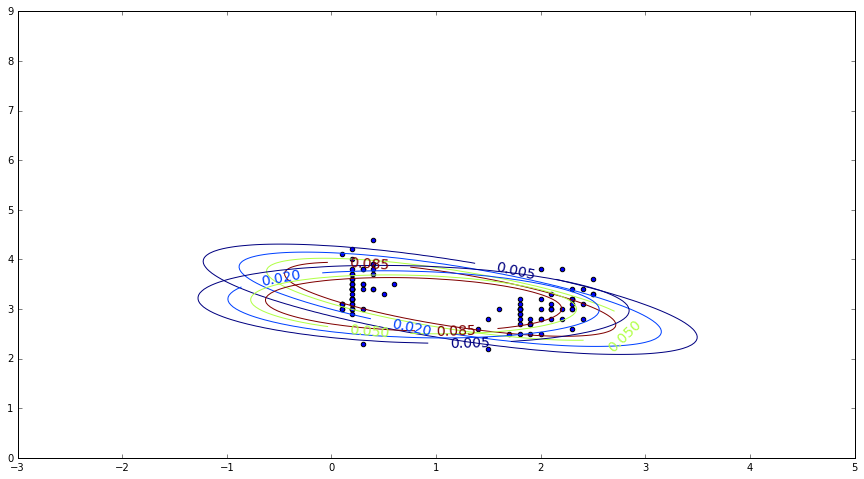

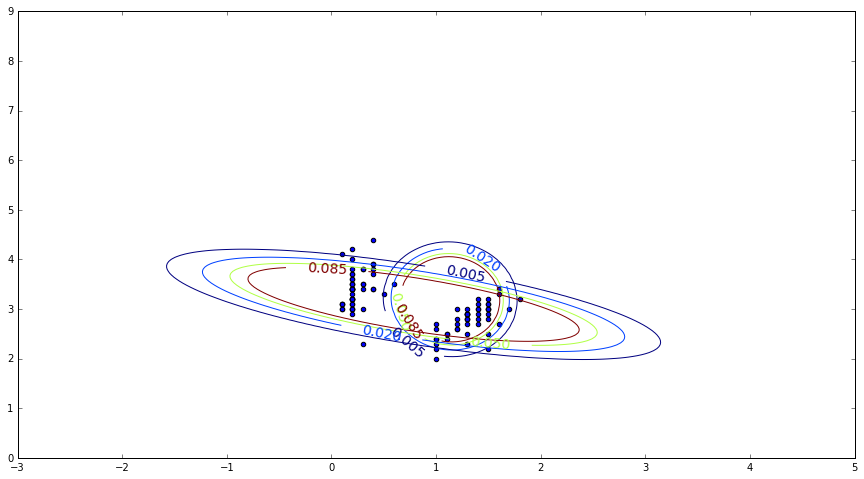

KeyboardInterrupt: 

In [66]:
for i in [[0, 1], [1, 3], [2, 3]]:
    cond_density_for_first_iris(i[0], i[1])
    cond_density_for_second_iris(i[0], i[1])
    cond_density_for_third_iris(i[0], i[1])